<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

### Load Dataset

In [2]:
iris = datasets.load_iris() # load the Iris dataset
X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal Width')

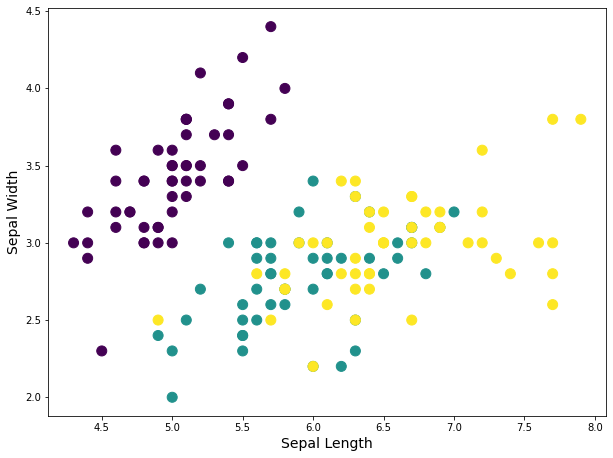

In [3]:
fig = plt.figure(figsize=(10, 7.5))
plt.scatter(X[:,0], X[:, 1], c=y, s=100)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

### K-Means Clustering

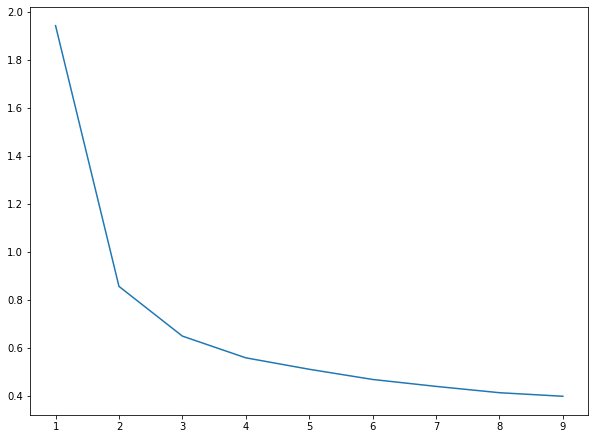

In [4]:
mean_dist = []

for k in range(1, 10):
  km = KMeans(n_clusters = k, random_state=42)
  km.fit(X)
  mean_dist.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1))/ X.shape[0])

fig = plt.figure(figsize=(10, 7.5))
plt.plot(range(1, 10), mean_dist)

In [5]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Predicted')

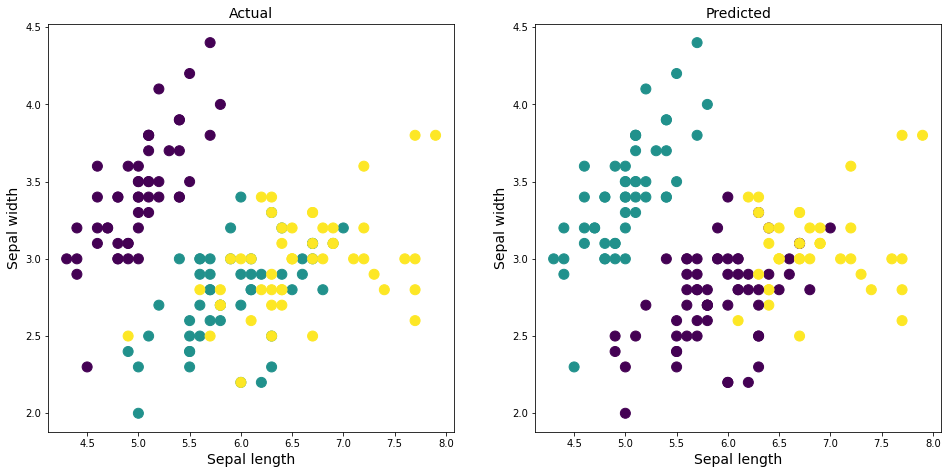

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7.5))

axes[0].scatter(X[:, 0], X[:, 1], c=y, s=100)
axes[0].set_xlabel('Sepal length', fontsize=14)
axes[0].set_ylabel('Sepal width', fontsize=14)
axes[0].set_title('Actual', fontsize=14)


axes[1].scatter(X[:, 0], X[:, 1], c=km.labels_, s=100)
axes[1].set_xlabel('Sepal length', fontsize=14)
axes[1].set_ylabel('Sepal width', fontsize=14)
axes[1].set_title('Predicted', fontsize=14)

### Hierarchical Clustering

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use Ward Variance Minimization Algorithm
L = linkage(X, 'ward')

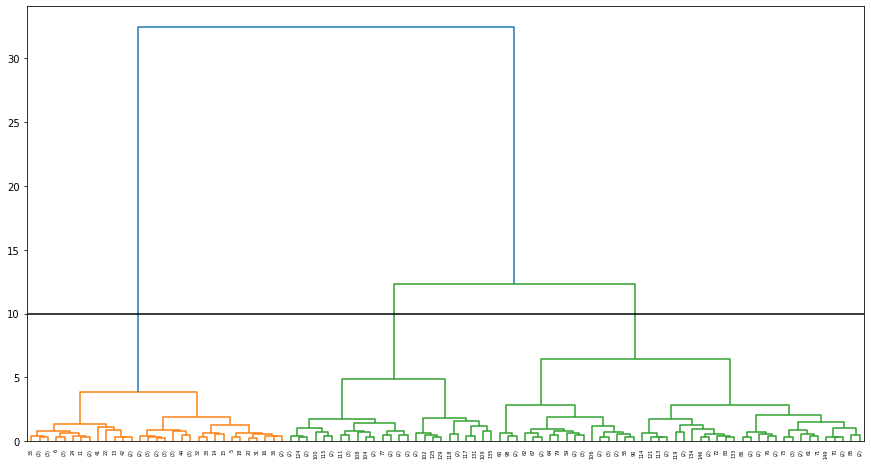

In [9]:
plt.figure(figsize=(15,8))

dendrogram(L, truncate_mode='lastp', p=100)
plt.axhline(y=10, c='k')
plt.show()